In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [4]:
cols = ['fLength','fWidth','fSize','fConc','fConci','fAsym','fM3Long','fM3Trans', 'fAlpha','fDist', 'class']
df = pd.read_csv('magic04.data', names=cols)
df

,fLength,fWidth,fSize,fConc,fConci,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [5]:
df['class'].value_counts()
#df['class'].unique()

g    12332
h     6688
Name: class, dtype: int64

In [6]:
#to convert values in class column into int as g will be turned into 1 and h into 0
df['class'] = (df['class']=='g').astype(int)

In [7]:
df

,fLength,fWidth,fSize,fConc,fConci,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


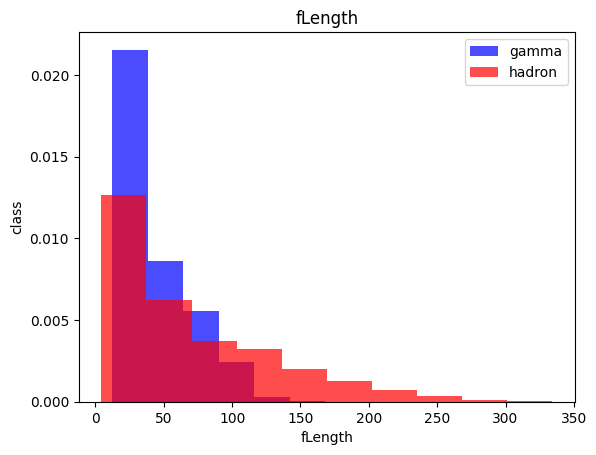

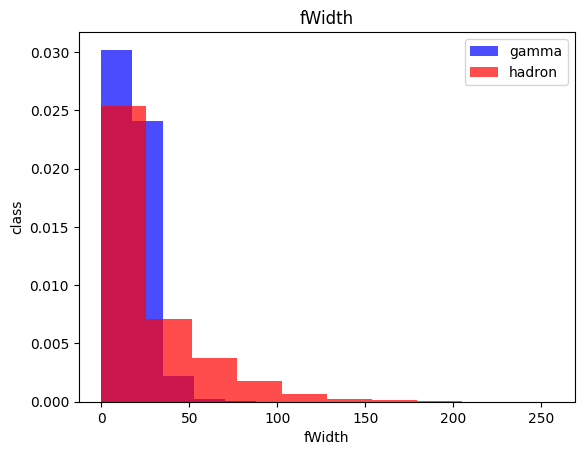

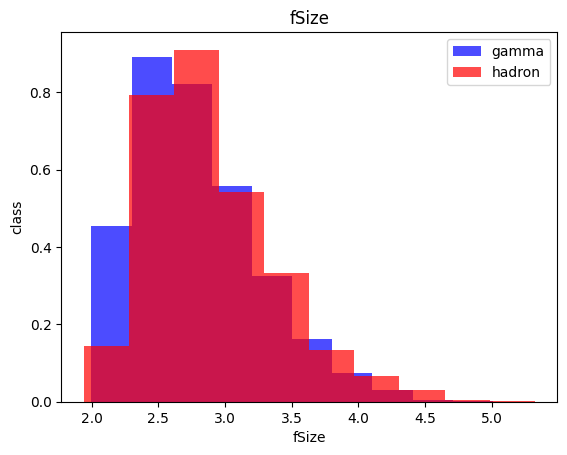

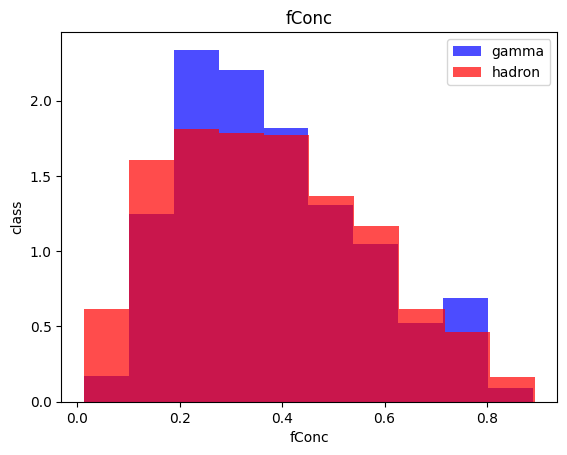

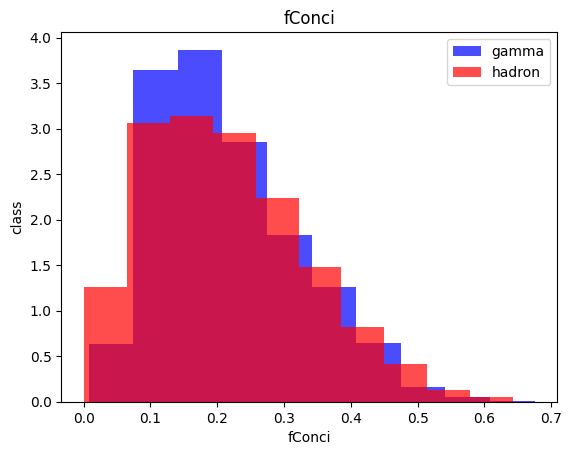

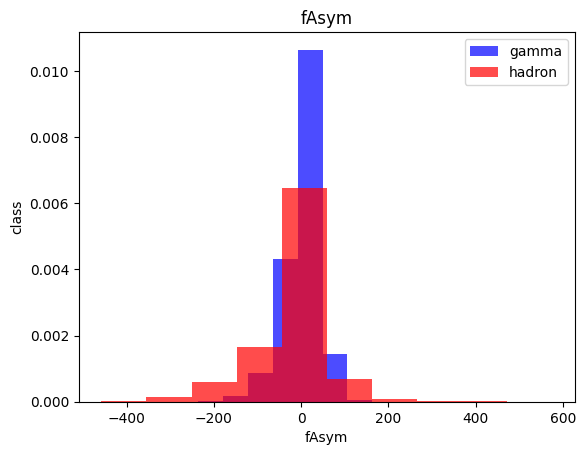

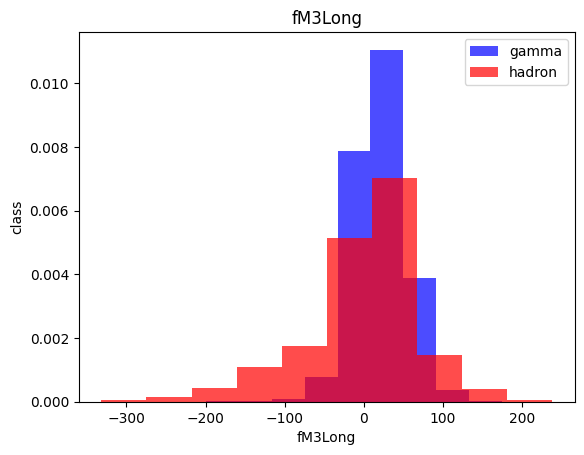

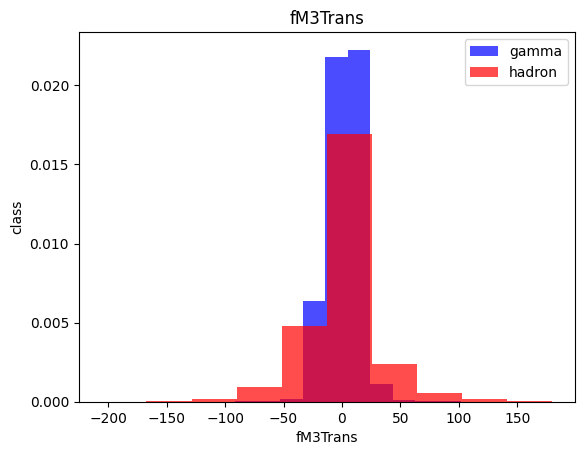

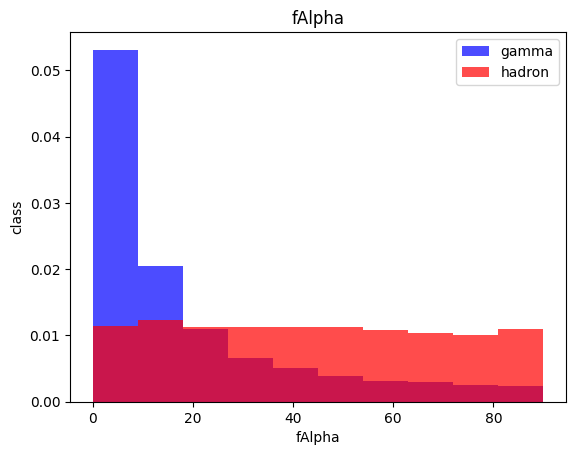

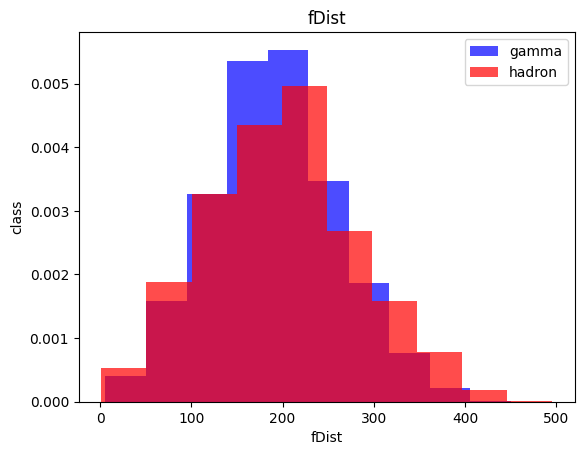

In [8]:
for label in cols[:-1]:
  plt.hist(df[df['class'] == 1][label], color='blue', label='gamma', alpha=0.7,density = True)
  plt.hist(df[df['class'] == 0][label], color='red', label='hadron', alpha=0.7,density = True)
  plt.title(label)
  plt.ylabel('class')
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [9]:
train,valid,test= np.split(df.sample(frac=1), [int((0.6)*len(df)), int((0.8)*len(df))])

In [10]:
test.shape

(3804, 11)

In [11]:
def scale_dataset(dataframe,oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values


  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X,y = ros.fit_resample(X,y)

  data = np.hstack((X,np.reshape(y,(-1,1))))

  return data,X,y

In [12]:
train,X_train, y_train = scale_dataset(train, oversample=True)
valid,X_valid, y_valid = scale_dataset(valid, oversample=False)
test,X_test, y_test = scale_dataset(test, oversample=False)

In [13]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [14]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)


KNeighborsClassifier()

In [15]:
y_preds = knn_model.predict(X_test)

In [16]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.74      0.73      0.74      1360
           1       0.85      0.86      0.86      2444

    accuracy                           0.81      3804
   macro avg       0.80      0.79      0.80      3804
weighted avg       0.81      0.81      0.81      3804



In [17]:
#naive bayes

from sklearn.naive_bayes import GaussianNB

In [18]:
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)

GaussianNB()

In [19]:
y_pred = nb_model.predict(X_test)

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.42      0.52      1360
           1       0.73      0.90      0.81      2444

    accuracy                           0.73      3804
   macro avg       0.71      0.66      0.66      3804
weighted avg       0.72      0.73      0.71      3804



In [21]:
## logistic regression


In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
logmodel = LogisticRegression()

In [24]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [25]:
y_pred = logmodel.predict(X_test)

In [26]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.72      0.69      0.70      1417
           1       0.82      0.84      0.83      2387

    accuracy                           0.78      3804
   macro avg       0.77      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



In [27]:
#SVM - Support vector machines


In [28]:
from sklearn.svm import SVC

In [29]:
svm_model = SVC()

In [30]:
svm_model.fit(X_train,y_train)

SVC()

In [31]:
y_pred = svm_model.predict(X_test)

In [32]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1338
           1       0.89      0.88      0.89      2466

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



In [38]:
##neural networks
import tensorflow as tf
from keras import layers
from keras.optimizers import Adam

In [36]:
X_test.shape

(3804, 10)

In [58]:
def train_model(X_train,y_train, nodes, dropout, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      layers.Dense(nodes,activation='relu',input_shape=(X_test.shape[1],)),
      layers.Dropout(dropout),
      layers.Dense(nodes, activation='relu'),
      layers.Dropout(dropout),
      layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(
      optimizer='Adam',
      loss='binary_crossentropy',
      metrics=['accuracy']
  )

  history = nn_model.fit(
      X_train,y_train,
      epochs=epochs,
      batch_size = batch_size,
      validation_split=0.2,
      verbose=0
  )

  return nn_model,history

In [53]:
def plot_loss(history):
  plt.plot(history.history['loss'],label='loss')
  plt.plot(history.history['val_loss'],label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Binary CrossEntropy')
  plt.legend()
  plt.grid(True)
  plt.show()



def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'],label='val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Binary CrossEntropy')
  plt.legend
  plt.grid(True)
  plt.show()

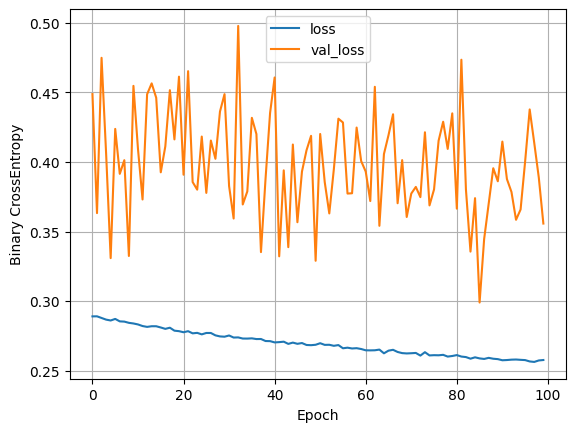

In [56]:
plot_loss(history)

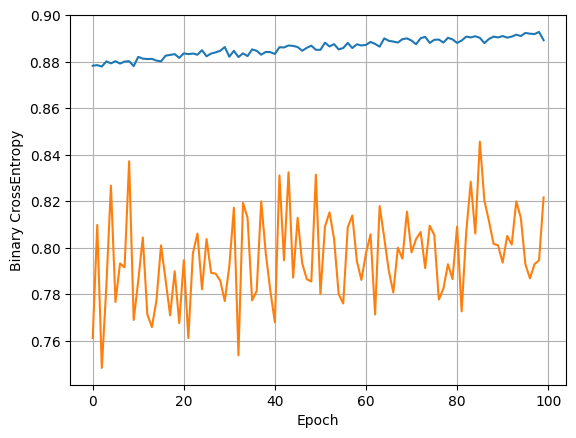

In [57]:
plot_accuracy(history)

In [ ]:
epochs = 100